In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/santander-train.csv


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold


In [6]:
import pandas as pd
df_train = pd.read_csv('/kaggle/input/santander-train.csv')

In [7]:
X = df_train.drop('TARGET',axis=1)
y= df_train['TARGET']

In [8]:
X.shape

(76020, 370)

In [10]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)
constant_filter = VarianceThreshold(threshold = 0)
constant_filter.fit(x_train)

VarianceThreshold(threshold=0)

In [11]:
constant_filter.get_support().sum()

331

In [12]:
constant_list = [not temp for temp in constant_filter.get_support()]
constant_list

[False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 

In [13]:
X.columns[constant_list]

Index(['ind_var2_0', 'ind_var2', 'ind_var27_0', 'ind_var28_0', 'ind_var28',
       'ind_var27', 'ind_var41', 'ind_var46_0', 'ind_var46', 'num_var27_0',
       'num_var28_0', 'num_var28', 'num_var27', 'num_var41', 'num_var46_0',
       'num_var46', 'saldo_var28', 'saldo_var27', 'saldo_var41', 'saldo_var46',
       'delta_imp_reemb_var33_1y3', 'delta_num_reemb_var33_1y3',
       'imp_amort_var18_hace3', 'imp_amort_var34_hace3',
       'imp_reemb_var13_hace3', 'imp_reemb_var33_hace3',
       'imp_reemb_var33_ult1', 'imp_trasp_var17_out_hace3',
       'imp_trasp_var33_out_hace3', 'num_var2_0_ult1', 'num_var2_ult1',
       'num_reemb_var13_hace3', 'num_reemb_var33_hace3',
       'num_reemb_var33_ult1', 'num_trasp_var17_out_hace3',
       'num_trasp_var33_out_hace3', 'saldo_var2_ult1',
       'saldo_medio_var13_medio_hace3', 'saldo_medio_var29_hace3'],
      dtype='object')

In [14]:
x_train_filter = constant_filter.transform(x_train)
x_test_filter = constant_filter.transform(x_test)

In [15]:
quasi_constant_filter = VarianceThreshold(threshold=0.01)

In [16]:
quasi_constant_filter.fit(x_train_filter)

VarianceThreshold(threshold=0.01)

In [17]:
quasi_constant_filter.get_support().sum()

271

In [18]:
x_train_quasi_filter = quasi_constant_filter.transform(x_train_filter)
x_test_quasi_filter = quasi_constant_filter.transform(x_test_filter)

In [19]:
x_train_T = x_train_quasi_filter.T
x_test_T = x_test_quasi_filter.T

In [20]:
type(x_train_T)

numpy.ndarray

In [21]:
x_train_T = pd.DataFrame(x_train_T)
x_test_T = pd.DataFrame(x_test_T)

In [22]:
x_train_T.shape

(271, 60816)

In [24]:
x_train_T.duplicated().sum()

16

In [27]:
duplicated_features = x_train_T.duplicated()
duplicated_features

0      False
1      False
2      False
3      False
4      False
       ...  
266    False
267    False
268    False
269    False
270    False
Length: 271, dtype: bool

In [28]:
features_to_keep = [not index for index in duplicated_features]

In [29]:
x_train_unique = x_train_T[features_to_keep].T
x_test_unique = x_test_T[features_to_keep].T

In [30]:
x_train_unique.shape , x_train.shape

((60816, 255), (60816, 370))

In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

def run_randomforest(x_train,x_test,y_train,y_test):
    clf = RandomForestClassifier(n_estimators =100,random_state = 0,n_jobs = -1)
    clf.fit(x_train,y_train)
    y_pred = clf.predict(x_test)
    print('Accuracy:')
    print(accuracy_score(y_test,y_pred))

In [45]:
%%time
run_randomforest(x_train_unique,x_test_unique,y_train,y_test)

Accuracy:
0.9567219152854513
CPU times: user 32.3 s, sys: 137 ms, total: 32.4 s
Wall time: 8.57 s


In [46]:
%%time
run_randomforest(x_train,x_test,y_train,y_test)

Accuracy:
0.9573796369376479
CPU times: user 37.6 s, sys: 306 ms, total: 37.9 s
Wall time: 10 s


In [48]:
corrmat = x_train_unique.corr()

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

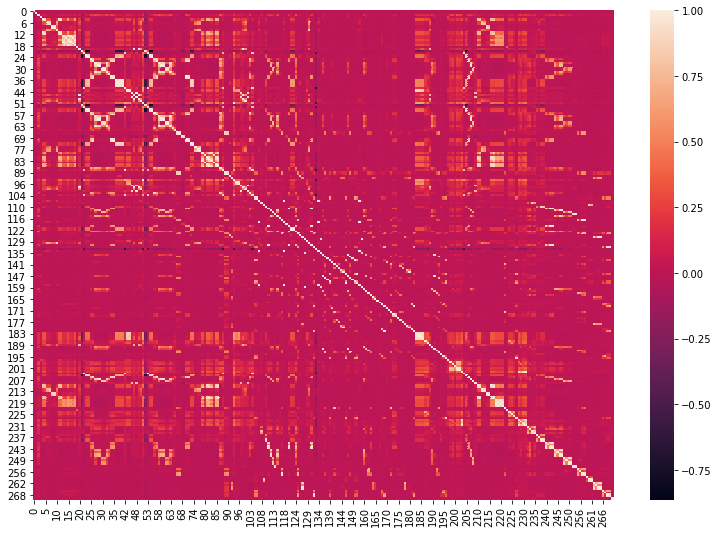

In [52]:
plt.figure(figsize = (13,9))
sns.heatmap(corrmat)

In [53]:
def get_correlation(data, threshold):
    corr_col = set()
    corrmat = set()
    corrmat = data.corr()
    for i in range(len(corrmat.columns)):
        for j in range(i):
            if abs(corrmat.iloc[i,j]) > threshold:
                colname = corrmat.columns[i]
                corr_col.add(colname)
                
    return corr_col

In [54]:
corr_features = get_correlation(x_train_unique , 0.85)
corr_features

{5,
 9,
 11,
 12,
 15,
 16,
 17,
 18,
 23,
 24,
 28,
 29,
 31,
 32,
 34,
 35,
 37,
 38,
 40,
 44,
 47,
 48,
 49,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 67,
 69,
 70,
 71,
 72,
 74,
 78,
 82,
 83,
 84,
 85,
 86,
 88,
 89,
 90,
 94,
 96,
 98,
 99,
 100,
 101,
 103,
 104,
 106,
 118,
 120,
 122,
 126,
 130,
 131,
 134,
 135,
 147,
 148,
 149,
 150,
 157,
 158,
 159,
 180,
 182,
 183,
 184,
 185,
 186,
 191,
 202,
 204,
 205,
 206,
 207,
 210,
 211,
 213,
 214,
 215,
 216,
 217,
 219,
 220,
 221,
 227,
 228,
 230,
 231,
 235,
 238,
 239,
 240,
 242,
 243,
 244,
 246,
 247,
 250,
 251,
 252,
 254,
 257,
 258,
 261,
 262,
 264,
 265,
 268,
 269}

In [57]:
x_train_uncorr = x_train_unique.drop(labels = corr_features,axis=1)
x_test_uncorr = x_test_unique.drop(labels = corr_features,axis=1)

In [58]:
x_train_uncorrr.shape , x_test_uncorr.shape

((60816, 134), (15204, 134))

In [59]:
%%time
run_randomforest(x_train_uncorr,x_test_uncorr,y_train,y_test)

Accuracy:
0.9567219152854513
CPU times: user 23.4 s, sys: 88 ms, total: 23.5 s
Wall time: 6.24 s


In [ ]:
%%time
run_randomforest(x_train,x_test,y_train,y_test)